In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [ ]:
PATH = "employee.csv"
dataset = pd.read_csv(PATH)

In [ ]:
for column in dataset:
    if dataset[column].dtype == 'object':
        dataset[column] = pd.factorize(dataset[column])[0]

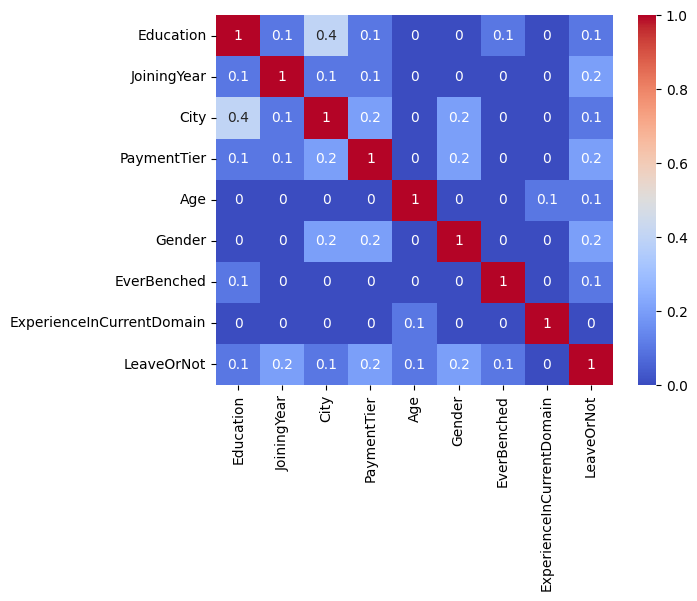

In [ ]:
sns.heatmap(
    round(abs(dataset.corr()), 1),
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [ ]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset[['JoiningYear', 'ExperienceInCurrentDomain']],  # Признаки
    dataset['LeaveOrNot'],  # Целевая переменная
    test_size=0.2,
    random_state=42
)

In [ ]:
model = GaussianNB()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)

print(f"Точность модели на тестовой выборке: {accuracy * 100:.2f}%")

Точность модели на тестовой выборке: 72.72%
